In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
import seaborn as sns

In [4]:
data = pd.read_csv('../../Downloads/final_csv_of_divvy_rides.csv')

/home/nick/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,bikeid,birthday,birthyear,from_station_id,from_station_name,gender,starttime,stoptime,to_station_id,to_station_name,trip_id,tripduration,usertype
0,480,NaN,NaN,85,Michigan Ave & Oak St,NaN,2013-06-27 12:11,2013-06-27 12:16,28,Larrabee St & Menomonee St,4118,316,Customer
1,77,NaN,NaN,32,Racine Ave & Congress Pkwy,NaN,2013-06-27 14:44,2013-06-27 14:45,32,Racine Ave & Congress Pkwy,4275,64,Customer
2,77,NaN,NaN,32,Racine Ave & Congress Pkwy,NaN,2013-06-27 14:58,2013-06-27 15:05,19,Loomis St & Taylor St,4291,433,Customer
3,77,NaN,NaN,19,Loomis St & Taylor St,NaN,2013-06-27 15:06,2013-06-27 15:09,19,Loomis St & Taylor St,4316,123,Customer
4,77,NaN,NaN,19,Loomis St & Taylor St,NaN,2013-06-27 15:13,2013-06-27 15:27,55,Halsted St & James M Rochford St,4342,852,Customer


In [6]:
data['to_station_name'].value_counts().head(10)

Streeter Dr & Illinois St       164101
Lake Shore Dr & Monroe St       122493
Theater on the Lake             115330
Clinton St & Washington Blvd    110611
Millennium Park                 110085
Michigan Ave & Oak St           109586
Lake Shore Dr & North Blvd      101364
Canal St & Madison St            96899
Canal St & Adams St              85913
McClurg Ct & Illinois St         69345
Name: to_station_name, dtype: int64

In [7]:
departure_arrival = pd.DataFrame(data['from_station_name'].value_counts()).join(data['to_station_name'].value_counts())

In [8]:
departure_arrival['net_departures'] = departure_arrival['from_station_name'] - departure_arrival['to_station_name']

In [9]:
departure_arrival.sort_values(by='net_departures', ascending=False)

,from_station_name,to_station_name,net_departures
Columbus Dr & Randolph St,70126,47723.0,22403.0
Canal St & Monroe St,34496,22198.0,12298.0
Clinton St & Madison St,71598,63789.0,7809.0
Stetson Ave & South Water St,31514,23837.0,7677.0
Desplaines St & Kinzie St,46823,41509.0,5314.0
Franklin St & Jackson Blvd,60706,56046.0,4660.0
Michigan Ave & Madison St,30219,25816.0,4403.0
Daley Center Plaza,54887,50525.0,4362.0
Wells St & Walton St,23349,19022.0,4327.0
Franklin St & Lake St,38108,34066.0,4042.0


In [10]:
#departure_arrival.sort_values(by='net_departures')
departure_arrival.count()

from_station_name    581
to_station_name      579
net_departures       579
dtype: int64

In [11]:
departure_arrival.fillna(0, inplace=True)

In [12]:
departure_arrival.count()

from_station_name    581
to_station_name      581
net_departures       581
dtype: int64

In [13]:
departure_arrival['net_departures'] = departure_arrival['from_station_name'] - departure_arrival['to_station_name']

(array([ 389.,  101.,   47.,   22.,   11.,    2.,    3.,    3.,    1.,    2.]),
 array([  1.00000000e+00,   1.37692000e+04,   2.75374000e+04,
          4.13056000e+04,   5.50738000e+04,   6.88420000e+04,
          8.26102000e+04,   9.63784000e+04,   1.10146600e+05,
          1.23914800e+05,   1.37683000e+05]),
 <a list of 10 Patch objects>)

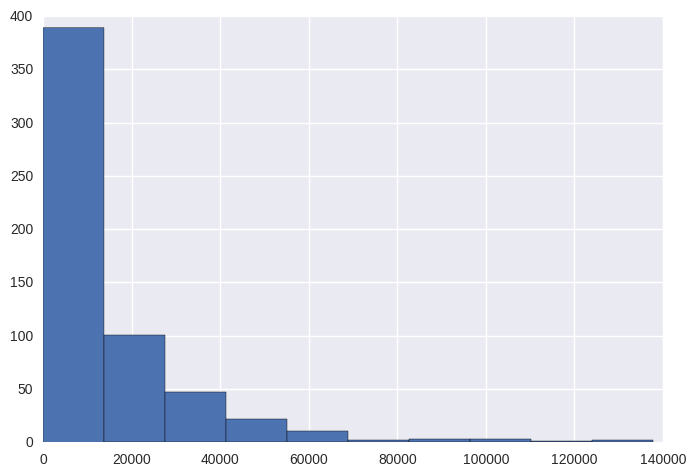

In [14]:
plt.hist(departure_arrival['from_station_name'])

(array([ 158.,   53.,   32.,   26.,   26.,   14.,   22.,   28.,   19.,
          11.,   20.,   12.,    9.,    7.,   14.,    7.,    9.,    9.,
           3.,   11.,    8.,    1.,    6.,   10.,    8.,    3.,    3.,
           4.,    3.,    1.,    2.,    4.,    3.,    2.,    2.,    4.,
           1.,    2.,    0.,    2.,    1.,    1.,    2.,    1.,    2.,
           0.,    1.,    2.,    0.,    1.,    1.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   1.37782000e+03,   2.75464000e+03,
          4.13146000e+03,   5.50828000e+03,   6.88510000e+03,
          8.26192000e+03,   9.63874000e+03,   1.10155600e+04,
          1.23923800e+04

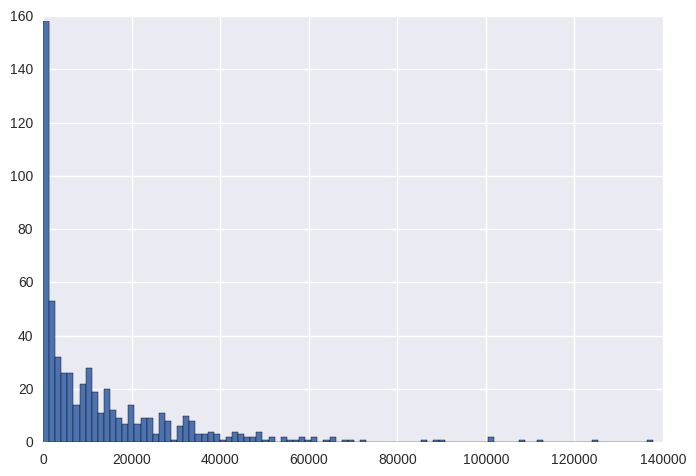

In [15]:
plt.hist(departure_arrival['from_station_name'], 100)

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    1.,    0.,    1.,    0.,
           0.,    0.,    1.,    1.,    0.,    0.,    1.,    0.,    1.,
           2.,    1.,    1.,    3.,    8.,    7.,   24.,   29.,  135.,
         255.,   52.,   14.,   10.,   12.,    6.,    1.,    3.,    2.,
           3.,    1.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([-26418.  , -25929.79, -25441.58, -24953.37, -24465.16, -23976.95,
        -23488.74, -23000.53, -22512.32, -22024.11, -21535.9 , -21047.69,
        -20559.48, -20071.27, -19583.06, -19094.85, -18606.64,

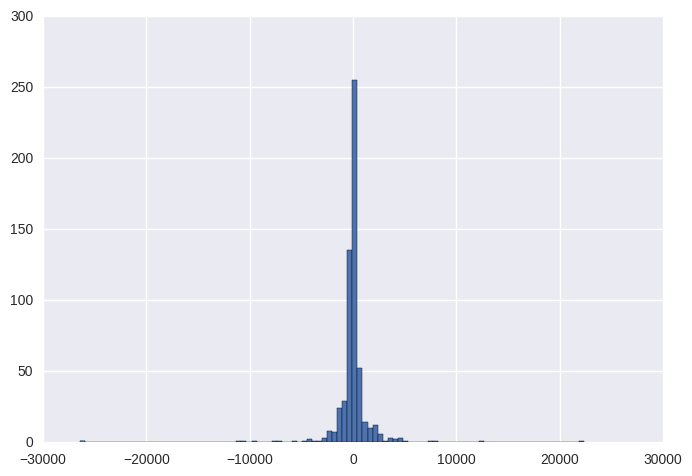

In [16]:
plt.hist(departure_arrival['net_departures'], 100)

In [17]:
departure_arrival['net_departures'].describe()

count      581.000000
mean         0.001721
std       2082.847606
min     -26418.000000
25%       -217.000000
50%          0.000000
75%        222.000000
max      22403.000000
Name: net_departures, dtype: float64

In [18]:
data.columns

Index([u'bikeid', u'birthday', u'birthyear', u'from_station_id',
       u'from_station_name', u'gender', u'starttime', u'stoptime',
       u'to_station_id', u'to_station_name', u'trip_id', u'tripduration',
       u'usertype'],
      dtype='object')

In [19]:
data['tripduration'].describe()

count    7.867601e+06
mean     1.035279e+03
std      2.063022e+03
min      6.000000e+01
25%      4.220000e+02
50%      7.300000e+02
75%      1.216000e+03
max      8.639900e+04
Name: tripduration, dtype: float64

In [20]:
print data['tripduration'].isnull().sum()
print data['tripduration'].isnull().any()
print data['tripduration'].isnull().value_counts()

0
False
False    7867601
Name: tripduration, dtype: int64


(array([  4.84321500e+06,   2.29507500e+06,   4.15107000e+05,
          1.29172000e+05,   5.97390000e+04,   3.51950000e+04,
          2.22590000e+04,   1.51910000e+04,   1.03980000e+04,
          7.24800000e+03,   5.37500000e+03,   4.15900000e+03,
          3.13500000e+03,   2.36100000e+03,   1.96400000e+03,
          1.67000000e+03,   1.31800000e+03,   1.11600000e+03,
          9.26000000e+02,   7.65000000e+02,   6.08000000e+02,
          5.99000000e+02,   5.10000000e+02,   4.59000000e+02,
          3.82000000e+02,   3.67000000e+02,   3.12000000e+02,
          2.69000000e+02,   2.77000000e+02,   2.18000000e+02,
          2.08000000e+02,   2.07000000e+02,   1.92000000e+02,
          1.69000000e+02,   1.89000000e+02,   1.64000000e+02,
          1.69000000e+02,   1.90000000e+02,   1.69000000e+02,
          1.53000000e+02,   1.35000000e+02,   1.43000000e+02,
          1.38000000e+02,   1.41000000e+02,   1.27000000e+02,
          1.38000000e+02,   1.31000000e+02,   1.09000000e+02,
        

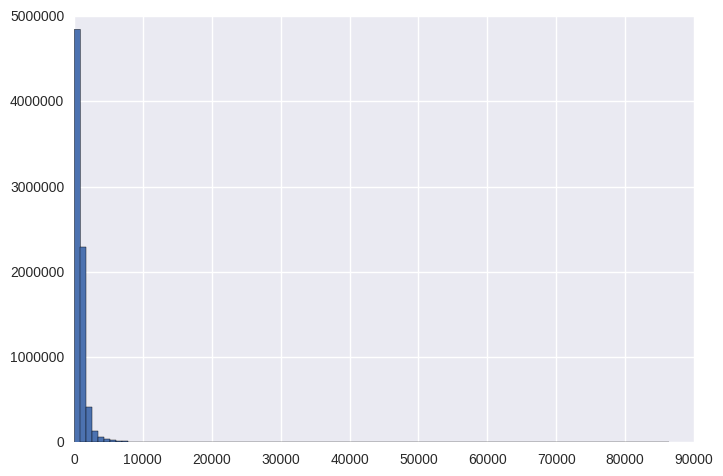

In [21]:
plt.hist(data['tripduration'], 100)

(0, 1800)

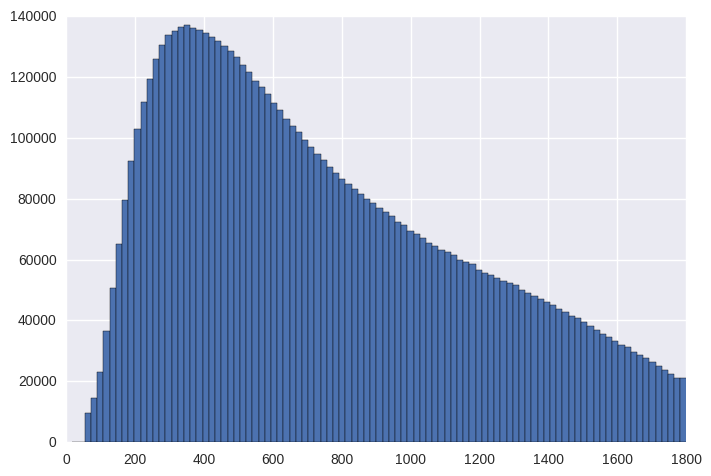

In [22]:
plt.hist(data['tripduration'], bins=100, range=[0, 1801])
plt.xlim(0, 1800)

In [23]:
data[(data['tripduration'] <= 1800.0)]['tripduration']

0           316
1            64
2           433
3           123
4           852
6          1094
7          1020
9           653
10         1738
12         1712
13          996
14          818
16          730
17         1292
18         1511
19         1512
20         1125
21          964
22          972
23          977
26         1758
27          730
30         1117
31          980
32         1642
35          423
38          944
39         1656
40          736
41          223
           ... 
7867571     871
7867572    1698
7867573     522
7867574    1320
7867575    1335
7867576    1707
7867577     469
7867578    1254
7867579    1178
7867580     404
7867581    1652
7867582    1322
7867583    1342
7867584     423
7867585     117
7867586     372
7867587     381
7867588     282
7867589     253
7867590     609
7867591    1540
7867592    1613
7867593     721
7867594     704
7867595     590
7867596     484
7867597     512
7867598     744
7867599     615
7867600     508
Name: tripduration, dtyp

(array([  13044.,   15049.,   25822.,   37343.,   49667.,   67006.,
          76123.,   93060.,   97456.,  105284.,  118877.,  118166.,
         130365.,  125873.,  127730.,  135669.,  129926.,  136540.,
         128147.,  127271.,  133963.,  125199.,  130722.,  122180.,
         120388.,  125586.,  115859.,  120413.,  111503.,  109629.,
         113356.,  104342.,  108486.,   99805.,   97779.,  101538.,
          93661.,   96684.,   89465.,   87536.,   90553.,   83489.,
          86743.,   80276.,   79109.,   82147.,   75975.,   78639.,
          73350.,   71844.,   75019.,   68821.,   71854.,   66347.,
          65063.,   67860.,   62754.,   65043.,   60607.,   59475.,
          62269.,   57813.,   59945.,   55568.,   55182.,   56438.,
          52525.,   54895.,   50765.,   50007.,   52298.,   48735.,
          50107.,   46550.,   45585.,   47460.,   43691.,   45364.,
          41547.,   40744.,   42132.,   38598.,   40008.,   36556.,
          35848.,   36040.,   33133.,   34042., 

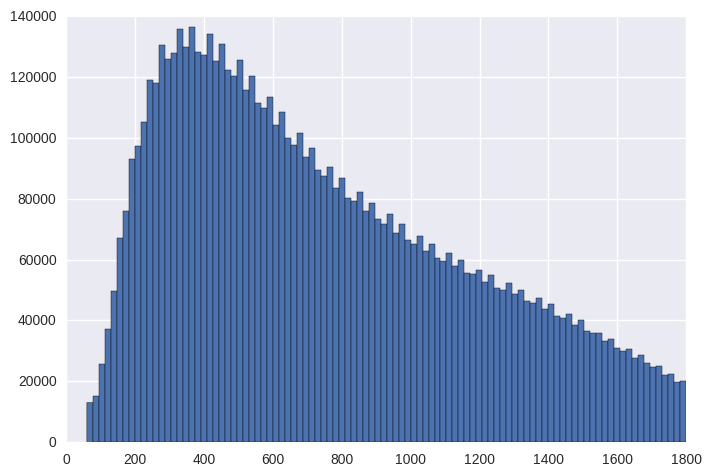

In [24]:
plt.hist(data[(data['tripduration'] <= 1800.0)]['tripduration'], bins=100)